In [1]:
import os
import numpy as np
import importlib
import time
import logging
from contextlib import contextmanager

In [2]:
from constants import ENVIRONMENT_PATH
import calculations as calculations
import plotter as plotter

/home/b08209033/IndianMonsoon/src/python/plotter.py:180: SyntaxWarning: invalid escape sequence '\p'
  fig.suptitle(f"Variable: $\phi$\nDate: {date}")
/home/b08209033/IndianMonsoon/src/python/plotter.py:238: SyntaxWarning: invalid escape sequence '\P'
  fig.suptitle(f"Variable: $\Psi$, Date: {date}")


In [3]:
do_preliminary_analysis_1 = True
do_preliminary_analysis_2 = True

In [4]:
logging.basicConfig(level=logging.INFO, format="%(message)s")


@contextmanager
def time_block(label: str):
    """
    Context manager for timing a block of code and logging the elapsed time.

    Parameters:
    ----------
    label : str
        A label for the block of code being timed.
    """
    start_time = time.time()
    yield  # This runs the block of code
    end_time = time.time()
    elapsed_time = end_time - start_time
    logging.info(f"took {elapsed_time:.2f} seconds, {label}")

## Preliminary Analysis #1

- Display y-z plane evolution of large-scale circulation
- Seasonal transition of large-scale circulation
- Shallow circulation and vertical MSE flux convergence
- Onset correlates with shallow convection and boundary flux

In [5]:
if do_preliminary_analysis_1:
    with time_block("Preliminary Analysis #1, Calculation"):
        with time_block("Zonal Wind Shear Calculation"):
            zws_raw, zws_smooth, zws_smooth_grad = (
                calculations.calculate_zonal_wind_shear(
                    os.path.join(ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW, "u.nc")
                )
            )
            years = np.arange(1979, 2022)
            onset_days = np.argmax(zws_smooth > 0, axis=1)
            monsoon_onset = dict(zip(years.tolist(), onset_days.tolist()))

            monsoon_onset_sorted = dict(
                sorted(monsoon_onset.items(), key=lambda item: item[1])
            )
        with time_block("Tropical Cyclone Occurrence Calculation"):
            occurrence_raw, occurrence_smooth = calculations.calculate_occurrence(
                os.path.join(
                    ENVIRONMENT_PATH.ABSOLUTE_PATH_TEMPEST,
                    "TropicalCycloneCount_925.csv",
                )
            )
        with time_block("Meridional Mean Zonal Mass Stream Function"):
            streamfunction_raw, streamfunction_smooth, streamfunction_grids = (
                calculations.calculate_streamfunction(
                    os.path.join(
                        ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW,
                        "pure_divergent_wind.nc",
                    )
                )
            )
        with time_block("Meridional Mean Potential Temperature"):
            (
                potential_temperature_raw,
                potential_temperature_smooth,
                potential_temperature_grids,
            ) = calculations.calculate_potential_temperature(
                os.path.join(ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW, "pt.nc")
            )
        with time_block("Meridional Mean Equivalent Potential Temperature"):
            (
                equivalent_potential_temperature_raw,
                equivalent_potential_temperature_smooth,
                equivalent_potential_temperature_grids,
            ) = calculations.calculate_equivalent_potential_temperature(
                os.path.join(ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW, "ept.nc")
            )
        with time_block("Meridional Mean Moist Static Energy Vertical Flux"):
            mse_flux_raw, mse_flux_smooth, mse_flux_grids = (
                calculations.calculate_MSE_vertical_flux(
                    os.path.join(ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW, "mse.nc"),
                    os.path.join(ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_RAW, "w.nc"),
                )
            )
    with time_block("Preliminary Analysis #2, Plot"):
        with time_block("Pre Plot Calculation"):
            # Parameters
            start = 90  # Calendar day
            step = 90  # Days

            sorted_indices = np.argsort(list(monsoon_onset.values()))
            early_onset_indices = sorted_indices[:10]
            late_onset_indices = sorted_indices[-10:]

            streamfunction_early_composite = np.mean(
                streamfunction_smooth[early_onset_indices], axis=0
            )
            streamfunction_late_composite = np.mean(
                streamfunction_smooth[late_onset_indices], axis=0
            )
            potential_temperature_early_composite = np.mean(
                potential_temperature_smooth[early_onset_indices], axis=0
            )
            potential_temperature_late_composite = np.mean(
                potential_temperature_smooth[late_onset_indices], axis=0
            )
            equivalent_potential_temperature_early_composite = np.mean(
                equivalent_potential_temperature_smooth[early_onset_indices], axis=0
            )
            equivalent_potential_temperature_late_composite = np.mean(
                equivalent_potential_temperature_smooth[late_onset_indices], axis=0
            )
            mse_flux_early_composite = np.mean(
                mse_flux_smooth[early_onset_indices], axis=0
            )
            mse_flux_late_composite = np.mean(
                mse_flux_smooth[late_onset_indices], axis=0
            )

            mse_flux_early_divergence = np.gradient(
                mse_flux_early_composite, mse_flux_grids["plev"] * 100, axis=1
            )
            mse_flux_late_divergence = np.gradient(
                mse_flux_late_composite, mse_flux_grids["plev"] * 100, axis=1
            )
    #     with time_block("Zonal Wind Shear Difference Chart"):
    #         figure_object = plotter.display_ZWS_evolution(
    #             (zws_raw, zws_smooth, zws_smooth_grad, occurrence_smooth)
    #         )
    #         _ = figure_object.savefig(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY, "ZWS_chart.png"
    #             )
    #         )
    #     with time_block("Meridional Mean Zonal Mass Stream Function"):
    #         animation_object = plotter.display_streamfunction_composites_evolution(
    #             streamfunction_composite=(
    #                 streamfunction_early_composite,
    #                 streamfunction_late_composite,
    #             ),
    #             grids=streamfunction_grids,
    #             start=start,
    #             step=step,
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "streamfunction_composites.mp4",
    #             )
    #         )
    #     with time_block("Meridional Mean Potential temperature"):
    #         animation_object = (
    #             plotter.display_potential_temperature_composites_evolution(
    #                 potential_temperature_composite=(
    #                     potential_temperature_early_composite,
    #                     potential_temperature_late_composite,
    #                 ),
    #                 grids=potential_temperature_grids,
    #                 start=start,
    #                 step=step,
    #             )
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "potential_temperature_composites.mp4",
    #             )
    #         )
    #     with time_block("Meridional Mean Equivalent Potential temperature"):
    #         animation_object = (
    #             plotter.display_equivalent_potential_temperature_composites_evolution(
    #                 equivalent_potential_temperature_composite=(
    #                     equivalent_potential_temperature_early_composite,
    #                     equivalent_potential_temperature_late_composite,
    #                 ),
    #                 grids=equivalent_potential_temperature_grids,
    #                 start=start,
    #                 step=step,
    #             )
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "equivalent_potential_temperature_composites.mp4",
    #             )
    #         )
    #     with time_block(
    #         "Meridional Mean Potential temperature and Mass Stream Function"
    #     ):
    #         animation_object = plotter.display_streamfunction_and_potential_temperature_composite_evolution(
    #             streamfunction_early_composite=streamfunction_early_composite,
    #             streamfunction_grids=streamfunction_grids,
    #             potential_temperature_early_composite=potential_temperature_early_composite,
    #             potential_temperature_grids=potential_temperature_grids,
    #             start=start,
    #             step=step,
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "streamfunction_and_theta_composites.mp4",
    #             )
    #         )
    #     with time_block(
    #         "Meridional Mean Equivalent Potential temperature and Mass Stream Function"
    #     ):
    #         animation_object = plotter.display_streamfunction_and_equivalent_potential_temperature_composite_evolution(
    #             streamfunction_early_composite=streamfunction_early_composite,
    #             streamfunction_grids=streamfunction_grids,
    #             equivalent_potential_temperature_early_composite=equivalent_potential_temperature_early_composite,
    #             equivalent_potential_temperature_grids=equivalent_potential_temperature_grids,
    #             start=start,
    #             step=step,
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "streamfunction_and_equiv_theta_composites.mp4",
    #             )
    #         )
    #     with time_block("Meridional Mean Moist Static Energy Vertical Flux"):
    #         animation_object = plotter.display_mse_flux_composites_evolution(
    #             mse_flux_composite=(mse_flux_early_composite, mse_flux_late_composite),
    #             grids=mse_flux_grids,
    #             start=start,
    #             step=step,
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "MSE_composites.mp4",
    #             )
    #         )
    #     with time_block(
    #         "Meridional Mean Divergence of Moist Static Energy Vertical Flux"
    #     ):
    #         animation_object = plotter.display_mse_flux_divergence_composites_evolution(
    #             mse_flux_divergence_composite=(
    #                 mse_flux_early_divergence,
    #                 mse_flux_late_divergence,
    #             ),
    #             grids=mse_flux_grids,
    #             start=start,
    #             step=step,
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "MSE_divergence_composites.mp4",
    #             )
    #         )
    #     with time_block(
    #         "Meridional Mean Moist Static Energy Vertical Flux and Mass Stream Function"
    #     ):
    #         animation_object = (
    #             plotter.display_streamfunction_and_mse_flux_composite_evolution(
    #                 streamfunction_early_composite=streamfunction_early_composite,
    #                 streamfunction_grids=streamfunction_grids,
    #                 mse_flux_early_composite=mse_flux_early_composite,
    #                 mse_flux_grids=mse_flux_grids,
    #                 start=start,
    #                 step=step,
    #             )
    #         )
    #         _ = animation_object.save(
    #             os.path.join(
    #                 ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
    #                 "streamfunction_and_MSE_composites.mp4",
    #             )
    #         )

took 94.12 seconds, Zonal Wind Shear Calculation
took 0.49 seconds, Tropical Cyclone Occurrence Calculation
took 176.56 seconds, Meridional Mean Zonal Mass Stream Function
took 238.19 seconds, Meridional Mean Potential Temperature
took 220.07 seconds, Meridional Mean Equivalent Potential Temperature
took 326.39 seconds, Meridional Mean Moist Static Energy Vertical Flux
took 1055.83 seconds, Preliminary Analysis #1, Calculation
took 0.01 seconds, Pre Plot Calculation
took 0.01 seconds, Preliminary Analysis #2, Plot


Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 2560x1440 -pix_fmt rgba -framerate 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /home/b08209033/IndianMonsoon/img/preliminary/streamfunction_composites.mp4
took 17.25 seconds, Meridional Mean Zonal Mass Stream Function


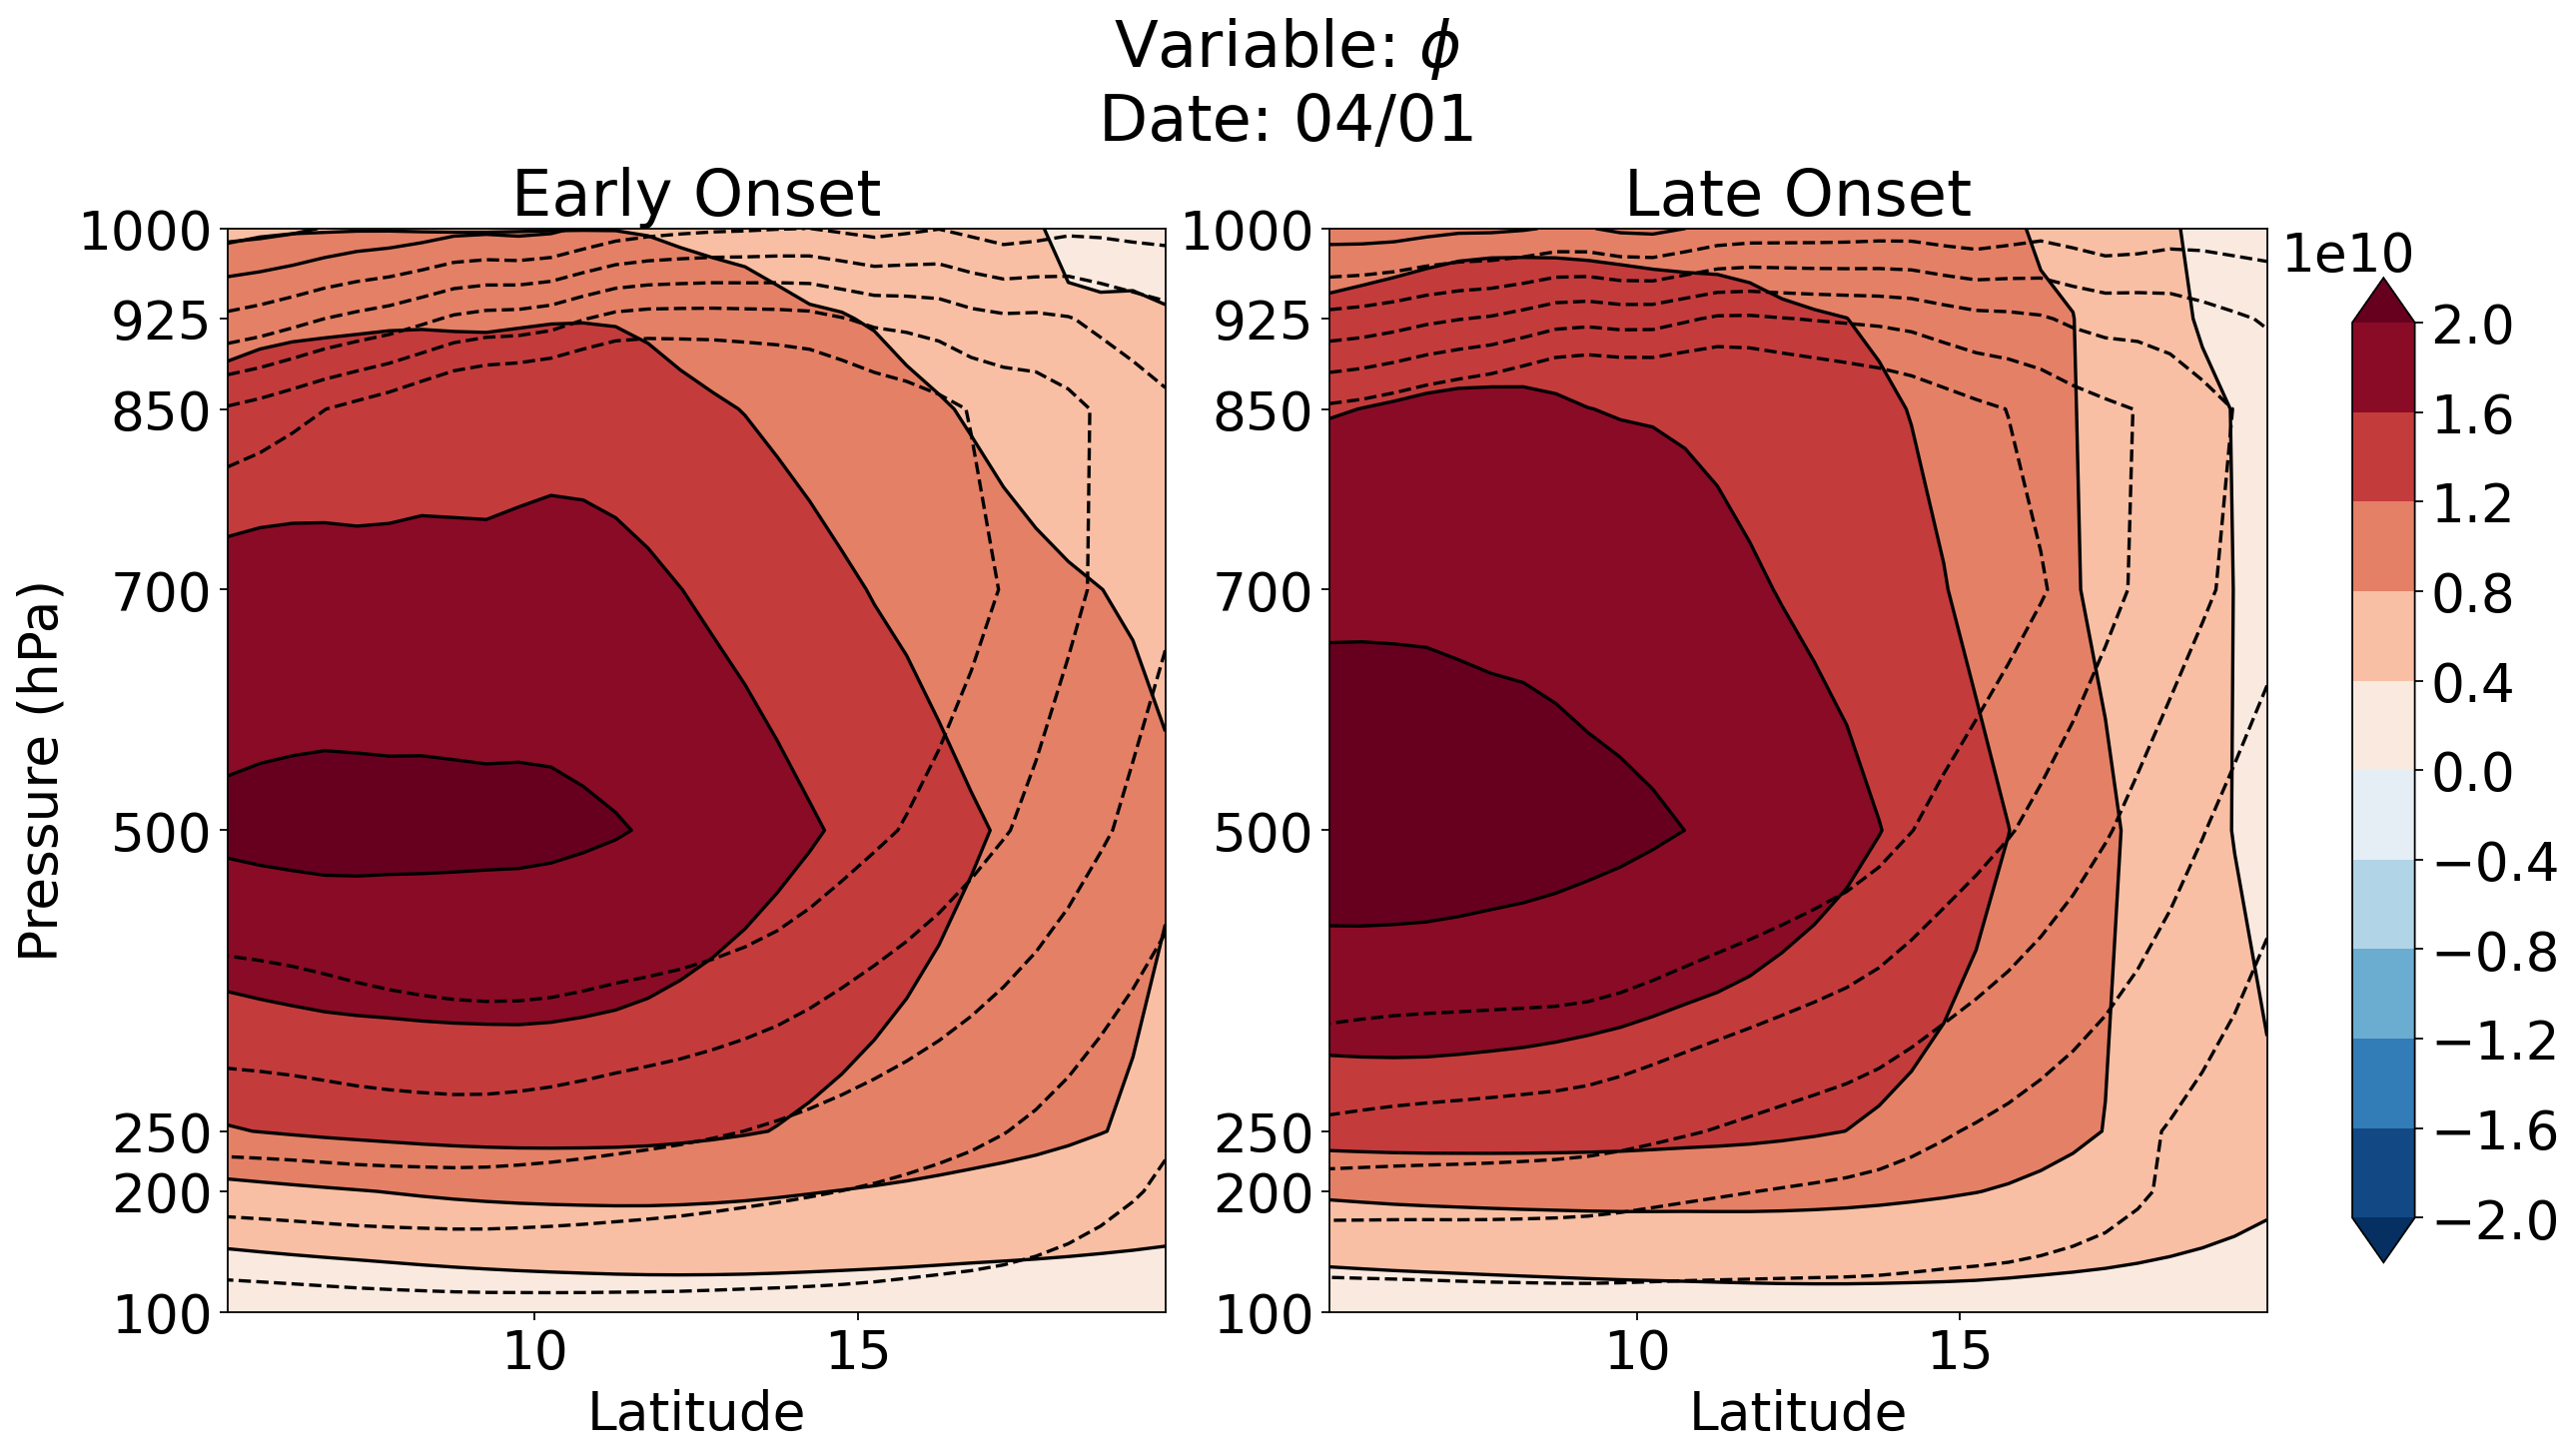

In [6]:
with time_block("Meridional Mean Zonal Mass Stream Function"):
    importlib.reload(plotter)
    animation_object = plotter.display_streamfunction_composites_evolution(
        streamfunction_composite=(
            streamfunction_early_composite,
            streamfunction_late_composite,
        ),
        grids=streamfunction_grids,
        start=start,
        step=step,
    )
    _ = animation_object.save(
        os.path.join(
            ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
            "streamfunction_composites.mp4",
        )
    )

In [7]:
with time_block(
    "Meridional Mean Moist Static Energy Vertical Flux and Mass Stream Function"
):
    importlib.reload(plotter)
    animation_object = plotter.display_streamfunction_and_mse_flux_composite_evolution(
        streamfunction_early_composite=streamfunction_early_composite,
        streamfunction_grids=streamfunction_grids,
        mse_flux_early_composite=mse_flux_early_composite,
        mse_flux_grids=mse_flux_grids,
        start=start,
        step=step,
    )
    _ = animation_object.save(
        os.path.join(
            ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES_PRELIMINARY,
            "streamfunction_and_MSE_composites.mp4",
        )
    )

/home/b08209033/IndianMonsoon/src/python/plotter.py:180: SyntaxWarning: invalid escape sequence '\p'
  fig.suptitle(f"Variable: $\phi$\nDate: {date}")
/home/b08209033/IndianMonsoon/src/python/plotter.py:238: SyntaxWarning: invalid escape sequence '\P'
  fig.suptitle(f"Variable: $\Psi$, Date: {date}")
Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 2560x1440 -pix_fmt rgba -framerate 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /home/b08209033/IndianMonsoon/img/preliminary/streamfunction_and_MSE_composites.mp4
took 10.95 seconds, Meridional Mean Moist Static Energy Vertical Flux and Mass Stream Function


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(dpi = 160, figsize = (20,9))
# plt.plot(np.arange(1,366), np.mean(np.where(np.isnan(zws_smooth),np.nanmean(zws_smooth),zws_smooth),axis = 0), c="red", linestyle="-", linewidth = 4, zorder = 10)
# plt.plot(np.arange(1,366),zws_smooth.T, c="grey", linestyle="-", linewidth = 0.8)
# plt.plot([1,365],[0,0], c="black", linestyle="--", linewidth = 2.5)
# plt.scatter([138], [0], s = 100, c="blue",zorder = 20)
# plt.xlabel("Date")
# plt.ylabel("Zonal Wind Shear (m/s)")
# plt.xticks([1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335], ["01/01","02/01","03/01","04/01","05/01","06/01","07/01","08/01","09/01","10/01","11/01","12/01"],fontsize = 16)
# plt.xlim(1,365)
# plt.ylim(-15,15)
# plt.title("Indian Monsoon Index\n 05/18")

# plt.legend(labels = ['Climatological', 'Individual year'], loc = 'upper right')
# plt.show()

## Preliminary Analysis #2

- Display wavenumber-frequency diagram
- Detect significant equatorial wave signals if possible

In [7]:
def reader(
    file_path: str, variable_name: str, pressure_level: int
) -> tuple[np.ndarray, dict[str, np.ndarray]]:
    """
    Extracts a variable and its associated dimensions from a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file.
        variable_name (str): Name of the variable to extract.
        pressure_level (int): Index of the pressure level to extract for 4D datasets.

    Returns:
        tuple[np.ndarray, dict[str, np.ndarray]]:
            - A NumPy array containing the extracted variable data.
            - A dictionary of dimension names mapped to their associated values.

    Raises:
        ValueError: If unsupported dimensions are encountered.
    """
    from netCDF4 import Dataset

    with Dataset(file_path, mode="r") as dataset:
        # Retrieve variable dimensions and their values
        dimension_names = dataset[variable_name].dimensions
        dimensions = {name: dataset[name][:] for name in dimension_names}

        # Validate dimension names and prepare slicing
        variable_slices = []
        for name in dimension_names:
            if name == "plev":
                variable_slices.append(pressure_level)  # Slice by pressure level
                dimensions[name] = dimensions[name][
                    pressure_level
                ]  # Update dimension value
            elif name in {"time", "lat", "lon"}:
                variable_slices.append(slice(None))  # No slicing for these dimensions
            else:
                raise ValueError(f"Unsupported dimension: '{name}' encountered.")

        # Extract the variable data using the prepared slices
        variable = dataset[variable_name][tuple(variable_slices)]

    return variable, dimensions

In [ ]:
if do_preliminary_analysis_2:
    with time_block("Wavenumber-Frequency Diagram"):
        importlib.reload(calculations)
        # file_path = os.path.join(
        #     ENVIRONMENT_PATH.ABSOLUTE_PATH_SATELLITE_TEST, "OLR_sparse.nc"
        # )
        # variable_name = "olr"
        # pressure_level = -2
        # variable, dimensions = reader(
        #     file_path=file_path,
        #     variable_name=variable_name,
        #     pressure_level=pressure_level,
        # )

        file_path = os.path.join(
            ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_SPARSE, "sparse_v.nc"
        )
        variable_name = "v"
        pressure_level = 2
        meridional_wind, dimensions = reader(
            file_path=file_path,
            variable_name=variable_name,
            pressure_level=pressure_level,
        )
        variable = meridional_wind
        # file_path = os.path.join(
        #     ENVIRONMENT_PATH.ABSOLUTE_PATH_ERA5_SPARSE, "sparse_mse.nc"
        # )
        # variable_name = "mse"
        # pressure_level = 2
        # specific_humidity, dimensions = reader(
        #     file_path=file_path,
        #     variable_name=variable_name,
        #     pressure_level=pressure_level,
        # )
        # variable_name = "meridional MSE flux"
        # variable = meridional_wind * specific_humidity

        symmetric_PSD, antisymmetric_PSD, background_PSD, grids = (
            calculations.calculate_SPSD(variable, dimensions)
        )
        try:
            print(grids["plev"])
        except:
            pass

took 7.12 seconds, Wavenumber-Frequency Diagram


20000.0


took 0.49 seconds, Plotting of Stochastic Power Spectra Density Ratio


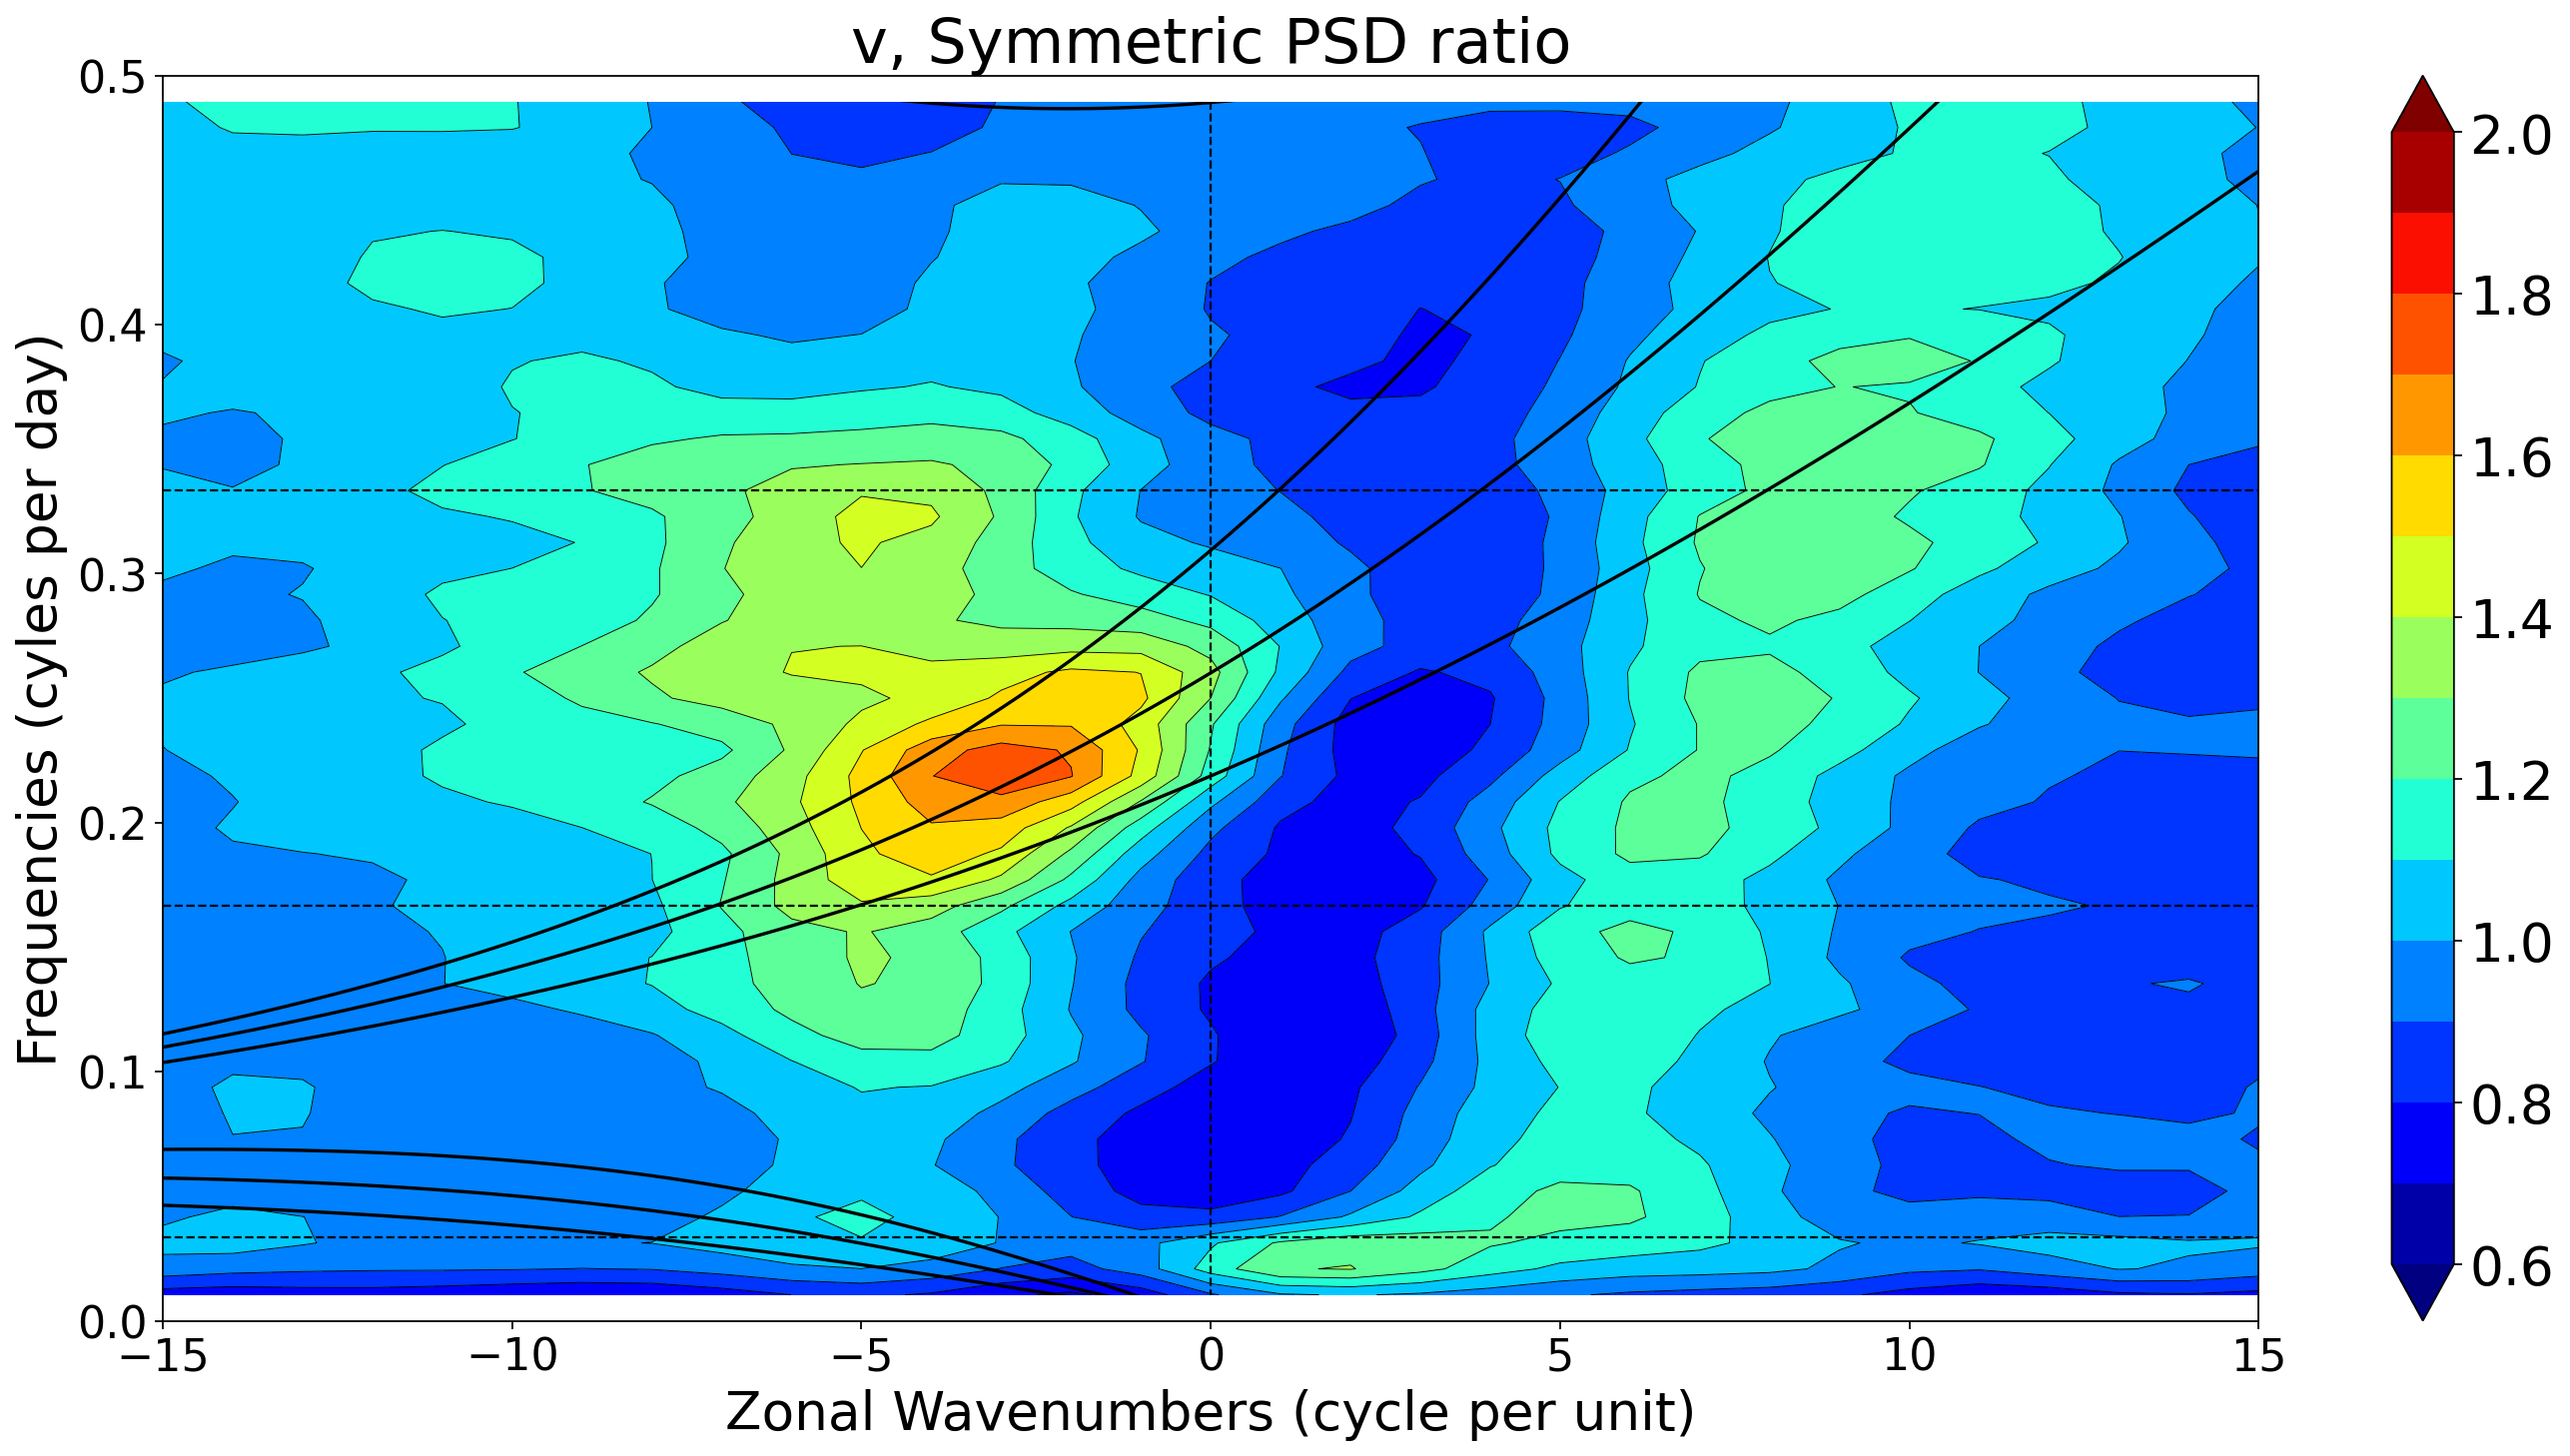

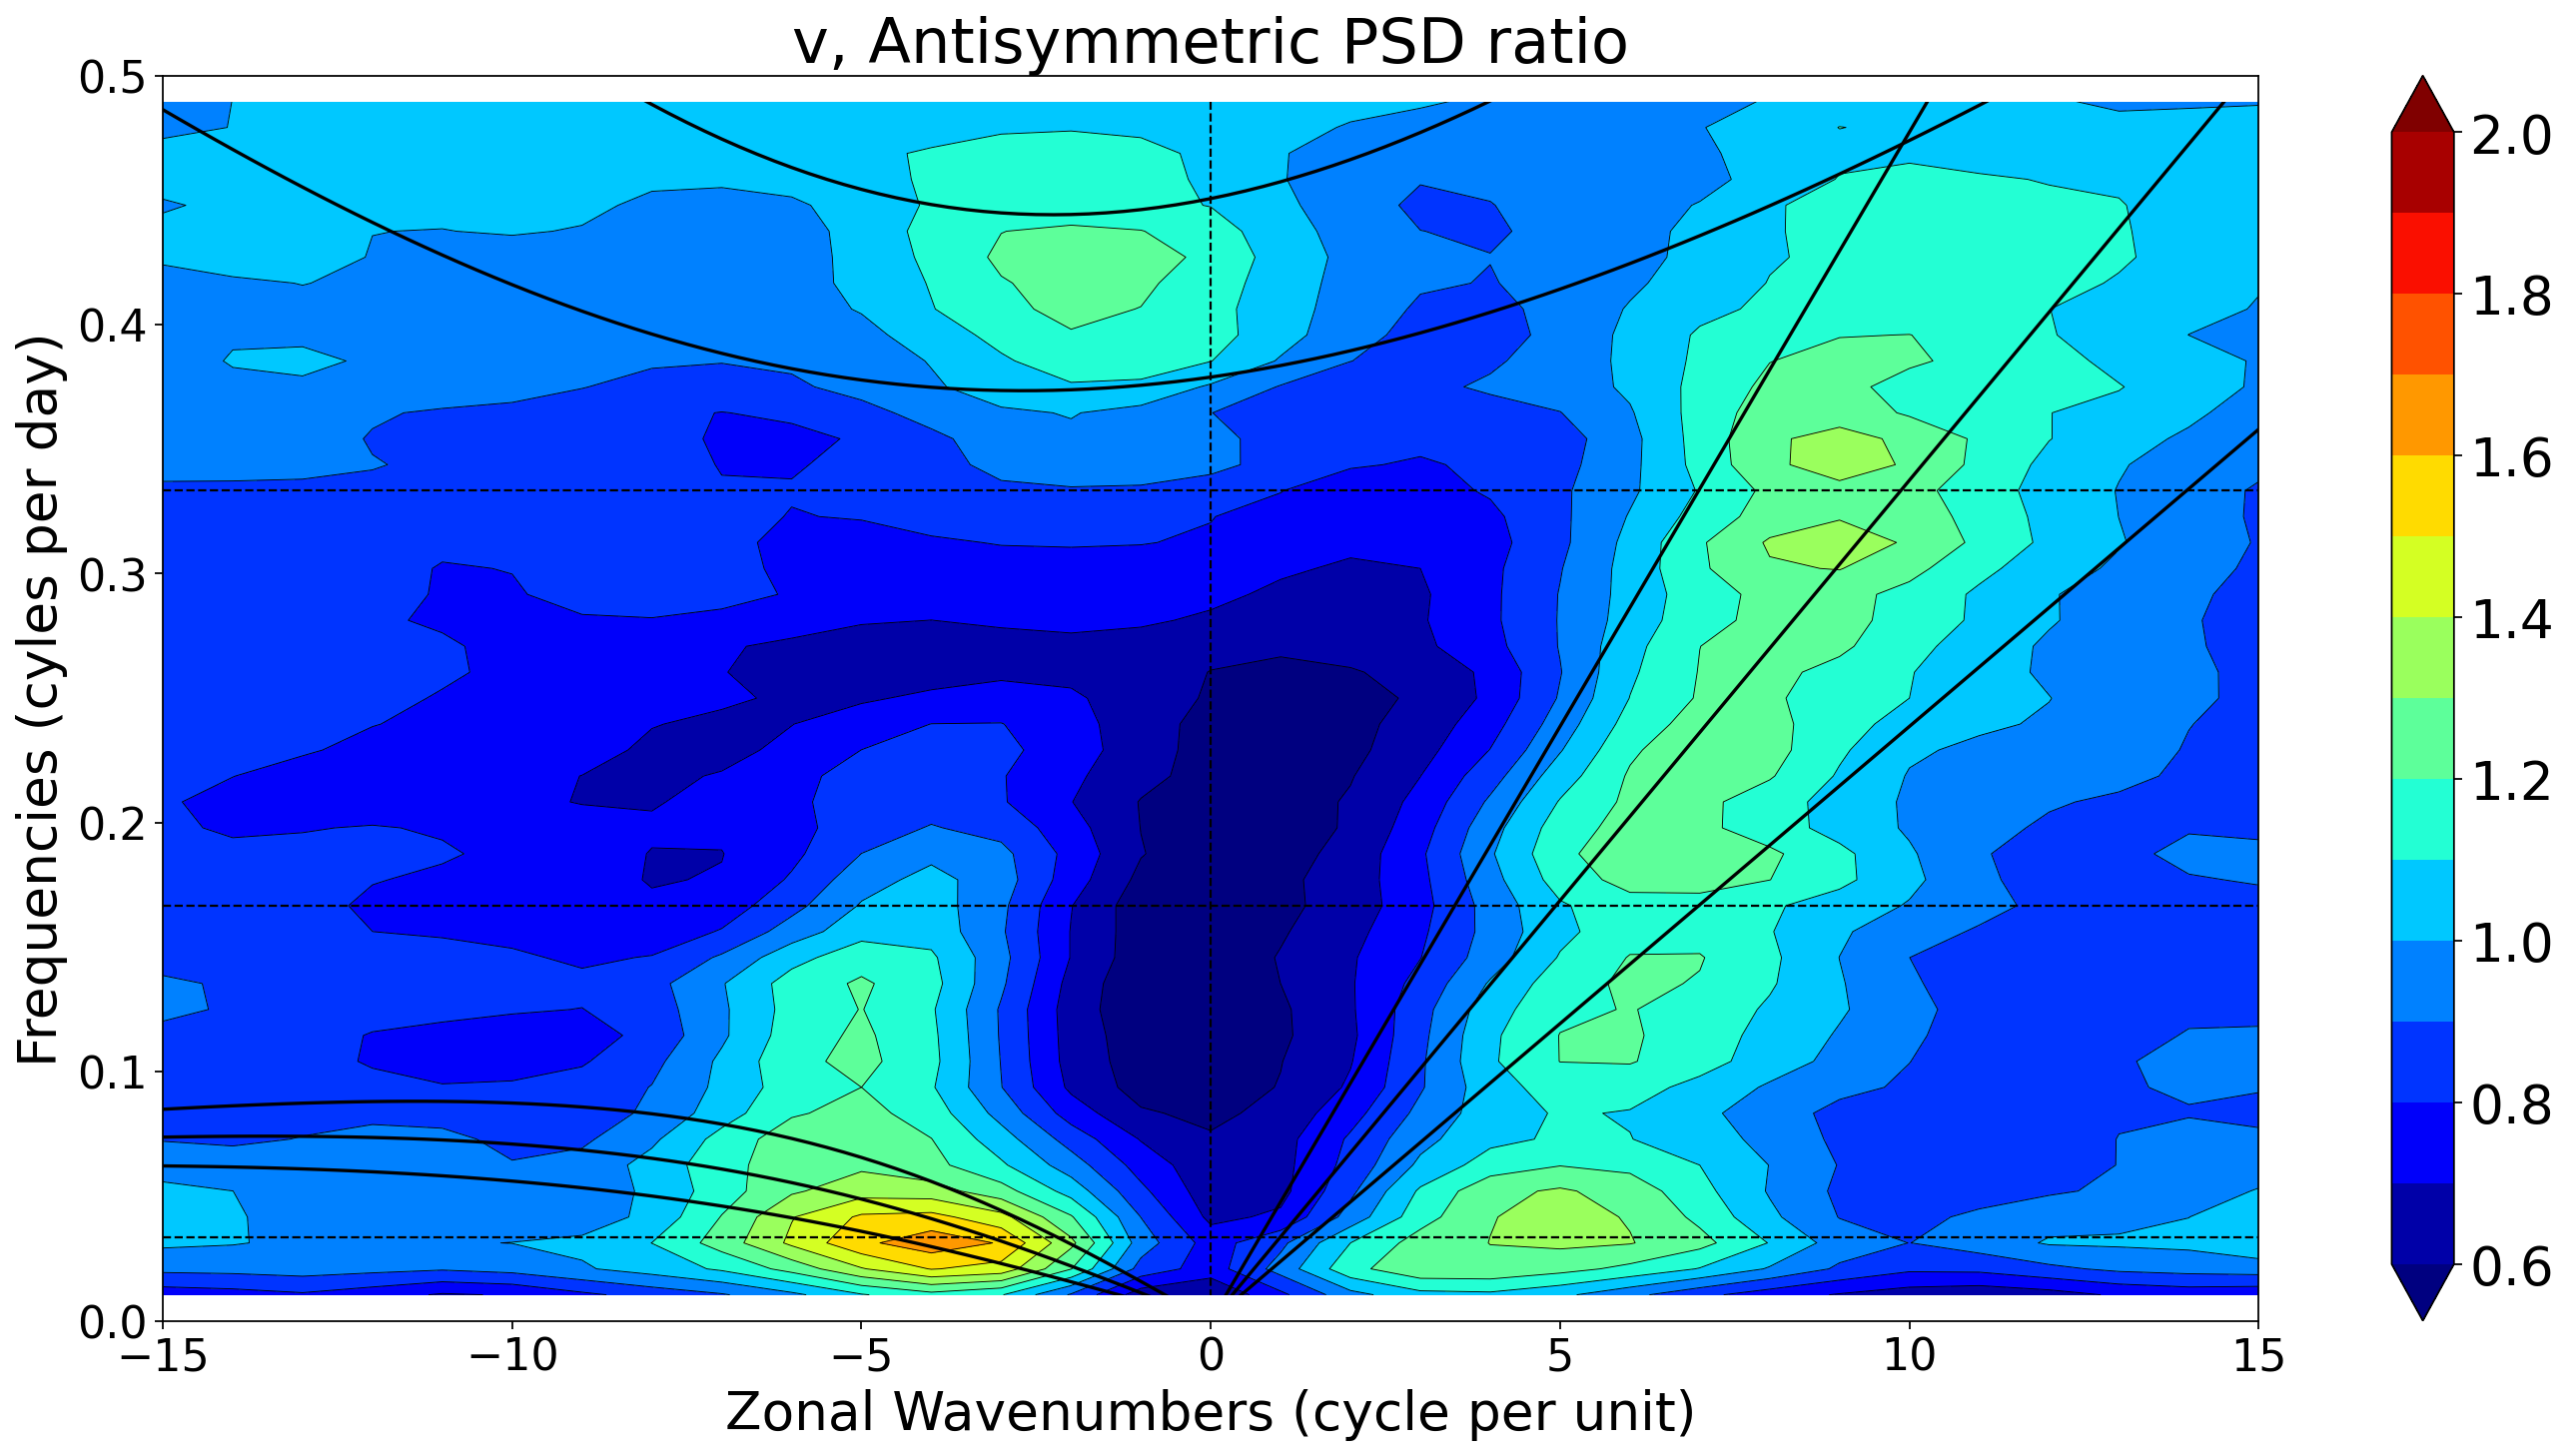

In [24]:
with time_block("Plotting of Stochastic Power Spectra Density Ratio"):
    importlib.reload(plotter)
    # filter_wnfr = [(3.5, 0.15), 2, 0.05]
    # wk_filter = [(-4.5, 0.02), 1.5, 0.03]
    wk_filter = None
    plotter.display_wavenumber_frequency_diagram(
        symmetric_PSD,
        antisymmetric_PSD,
        background_PSD,
        grids,
        wk_filter=wk_filter,
        variable_name=variable_name,
        dispersion_order="reverse",
        cmap_type="default",
        equivalent_depths=np.array([12.5, 25.0, 50.0]),
    )

In [ ]:
filtered_symmetric_components, filtered_antisymmetric_components, _ = (
    calculations.calculate_filtered_signal(
        file_path=filepath,
        zonal_wavenumber_limit=np.array(
            [filter_wnfr[0][0], filter_wnfr[0][0] + filter_wnfr[1]]
        ),
        segmentation_frequency_limit=np.array(
            [filter_wnfr[0][1], filter_wnfr[0][1] + filter_wnfr[2]]
        ),
        variable_name=varname,
    )
)

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.animation as animation

# Configure plot aesthetics
plt.rcParams.update({"font.size": 28})
figure, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(25, 9),
    dpi=160,
    sharex=True,
    sharey=True,
    subplot_kw={"projection": ccrs.PlateCarree()},
)


def init_animation():
    """Initialize the animation."""
    return []


def update_frame(days):
    """Update the animation frame by frame."""

    # Plot Early Onset Composite
    ax.cla()
    cf1 = ax.contourf(
        grids["lon"],
        grids["lat"],
        np.real(filtered_symmetric_components[days, :, :]),
        levels=np.linspace(-10, 10, 32),
        extend="both",
        cmap="RdBu_r",
        transform=ccrs.PlateCarree(),
    )
    ax.plot([0, 359], [0, 0], "k--", lw=2, transform=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-180, 180, -29, 29], crs=ccrs.PlateCarree())
    ax.set_ylabel("Longitude")
    ax.set_xlabel("Latitude")
    # Update the figure's super title
    figure.suptitle(f"{varname},  day: {days}")

    return []


# Create the animation
animation_obj = animation.FuncAnimation(
    figure,
    update_frame,
    frames=360,
    interval=200,
    init_func=init_animation,
)
_ = animation_obj.save(
    os.path.join(
        ENVIRONMENT_PATH.ABSOLUTE_PATH_IMAGES,
        f"{varname}_filter_test.mp4",
    )
)

In [ ]:
ilat = 8
plt.ion()
plt.figure(figsize=(9, 16))
plt.contourf(
    grids["lon"],
    np.arange(360),
    np.real(filtered_symmetric_components[360 * 2 : 360 * 3, ilat, :]),
    levels=np.linspace(-10, 10, 32),
    extend="both",
    cmap="RdBu_r",
)
plt.title(f"Lat: {grids["lat"][ilat]}")
plt.show()